# Análise de rotatividade


*Compreender as motivações por trás da rotatividade de funcionários em uma empresa é fundamental para construir uma força de trabalho estável e produtiva. No ambiente empresarial dinâmico de hoje, é crucial examinar de perto as razões que levam os colaboradores a deixar a organização e os efeitos decorrentes dessa saída. A análise detalhada desses fatores não apenas lança luz sobre as áreas problemáticas dentro da empresa, mas também oferece insights valiosos para o desenvolvimento de estratégias de retenção de talentos eficazes. Neste contexto, explorar as causas subjacentes da saída dos funcionários e os impactos resultantes proporciona um ponto de partida sólido para identificar e implementar soluções que possam melhorar tanto o ambiente de trabalho quanto o desempenho organizacional como um todo. Este ensaio abordará através de gráficos esses aspectos cruciais, destacando a importância de investigar as razões por trás da saída dos funcionários, entender as consequências envolvidas e apresentar abordagens viáveis para lidar com esses desafios persistentes.*

## Resultados obtidos através de pesquisas

![resultados](https://i.imgur.com/uxiMe1R.png)

## Bibliotecas que serão utilizadas

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Criação da Base de Dados

In [9]:
# DataFrame do Gráfico
dataset = [
    {'Fatores': 'Treinamento', 'Impacto': 11,'Pesquisa externa': 31,'Pesquisa interna': 23},
    {'Fatores': 'Conflitos internos', 'Impacto': 10,'Pesquisa externa': 11,'Pesquisa interna': 15},
    {'Fatores': 'Falta de reconhecimento', 'Impacto': 9,'Pesquisa externa': 65,'Pesquisa interna': 44},
    {'Fatores': 'Carga horaria', 'Impacto':8,'Pesquisa externa': 14,'Pesquisa interna': 39},
    {'Fatores': 'Progressao de carreira', 'Impacto': 7,'Pesquisa externa': 137,'Pesquisa interna': 171},
    {'Fatores': 'Remuneracao', 'Impacto':6,'Pesquisa externa': 16,'Pesquisa interna': 24},
    {'Fatores': 'Tipo de trabalho', 'Impacto':5,'Pesquisa externa': 128,'Pesquisa interna': 78},
    {'Fatores': 'Mudanca de carreira', 'Impacto': 4,'Pesquisa externa': 18,'Pesquisa interna': 30},
    {'Fatores': 'Trajeto', 'Impacto': 3,'Pesquisa externa': 31,'Pesquisa interna': 22},
    {'Fatores': 'Realocacao', 'Impacto': 2,'Pesquisa externa': 105,'Pesquisa interna': 37},
    {'Fatores': 'Doenca', 'Impacto': 1,'Pesquisa externa': 9,'Pesquisa interna': 21}
]

In [10]:
df = pd.DataFrame(dataset)
df

,Fatores,Impacto,Pesquisa externa,Pesquisa interna
0,Treinamento,11,31,23
1,Conflitos internos,10,11,15
2,Falta de reconhecimento,9,65,44
3,Carga horaria,8,14,39
4,Progressao de carreira,7,137,171
5,Remuneracao,6,16,24
6,Tipo de trabalho,5,128,78
7,Mudanca de carreira,4,18,30
8,Trajeto,3,31,22
9,Realocacao,2,105,37


## Salvar os dados para importa-los no Tableau

In [4]:
# Salvar arquivo .CSV
df.to_csv('Resultado.csv', index=False)

## Gráfico de Barras

<Axes: >

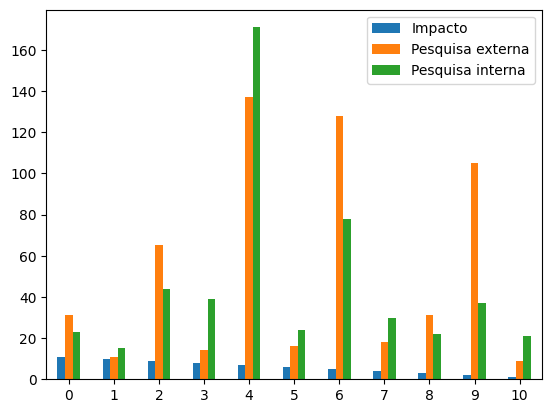

In [94]:
df.plot.bar(rot=0)

* Através do gráfico de barras podemos ter uma visão geral dos indicadores de rotatividade da empresa.
* Apesar de ter uma boa visualização ele não demonstra detalhes importantes de maneira clara e objetiva.

* Ponto Positivo:

**Visualização Comparativa:** *Os gráficos de barras são excelentes para comparar diferentes categorias ou grupos de dados. Eles tornam fácil identificar diferenças significativas entre os valores das categorias, o que é útil para análises de tendências e comparações visuais.*

* Ponto Negativo:

**Dificuldade em Lidar com Dados Contínuos:** *Os gráficos de barras não são a escolha ideal para representar dados contínuos ou de séries temporais, pois as barras podem não se conectar de maneira intuitiva. Para esses tipos de dados, um gráfico de linha pode ser mais apropriado.*

## Gráfico de Boxplot

In [41]:
df.describe().round(2)

,Impacto,Pesquisa externa,Pesquisa interna
count,11.00,11.00,11.00
mean,6.00,51.36,45.82
std,3.32,49.28,44.96
min,1.00,9.00,15.00
25%,3.50,15.00,22.50
50%,6.00,31.00,30.00
75%,8.50,85.00,41.50
max,11.00,137.00,171.00


<Axes: >

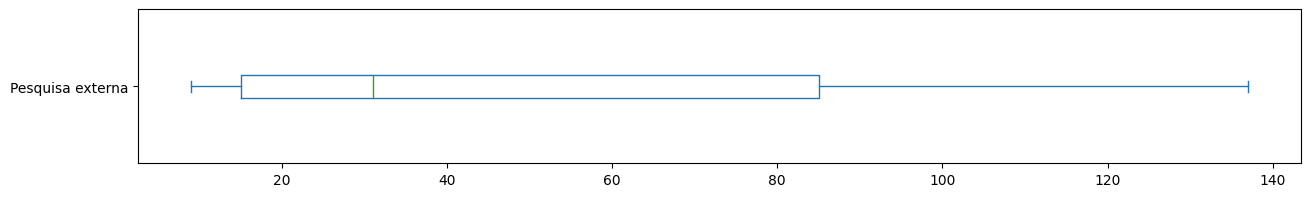

In [44]:
df['Pesquisa externa'].plot.box(vert=False,figsize=(15,2))

* Pesquisa interna sem nenhum outlier

<Axes: >

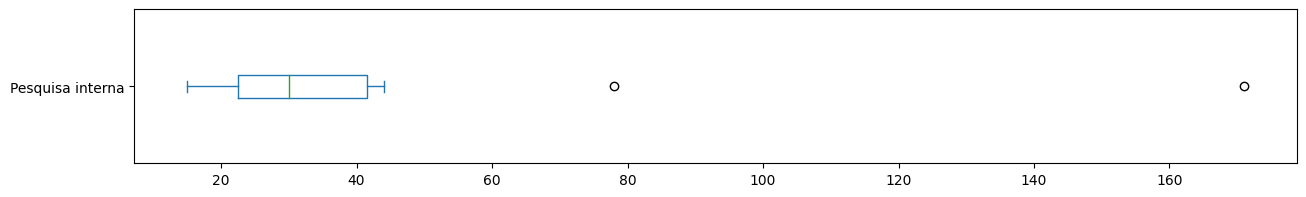

In [45]:
df['Pesquisa interna'].plot.box(vert=False, figsize=(15,2))

* Já na pesquisa interna identificamos 2 pontos muito acima da média que são: Tipo de Trabalho=78 e Progressão de Carreira=171

*É muito importante olharmos para esses outliers, pois mesmo não tendo um alto poder impacto na rotatividade de funcionários da empresa percebemos que acontece com uma frequência muito elevada, ainda mais se comparados aos demais indicadores*

* Ponto Positivo:

**Identificação de Outliers e Distribuição:** *Os gráficos de boxplot são úteis para identificar rapidamente a distribuição de dados, incluindo a presença de outliers. Eles fornecem uma representação visual da mediana, quartis e possíveis valores discrepantes em um conjunto de dados.*

* Ponto Negativo:

**Não Mostra a Estrutura Detalhada:** *Os gráficos de boxplot não fornecem detalhes sobre a estrutura interna dos dados, como a forma exata da distribuição. Eles são mais úteis para identificar valores discrepantes e tendências gerais, mas não são ideais para análises detalhadas de distribuições de dados complexas.*

## Gráfico de Linhas

In [95]:
# Copia o DataFrame principal
df2 = df.copy()

In [96]:
# Cria uma Series para cada coluna que vamos utilizar para fazer a correlação
coluna1 = pd.Series(df2['Pesquisa interna'])
coluna2 = pd.Series(df2['Pesquisa externa'])

In [97]:
correlacao = coluna1.corr(coluna2)
correlacao.round(2)

0.79

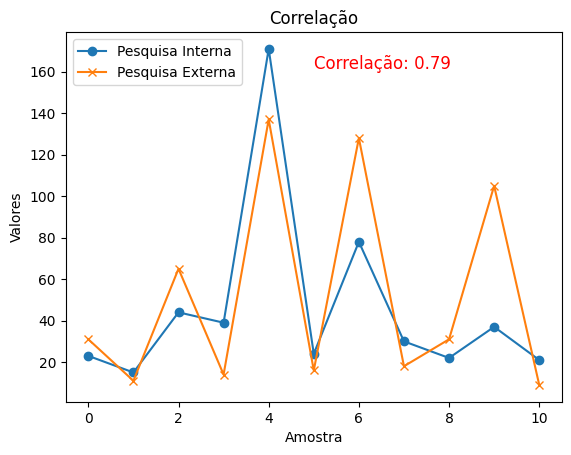

In [98]:
plt.plot(coluna1, label='Pesquisa Interna', linestyle='-', marker='o')
plt.plot(coluna2, label='Pesquisa Externa', linestyle='-', marker='x')
plt.title('Correlação')
plt.xlabel('Amostra')
plt.ylabel('Valores')
plt.legend()
plt.legend(loc='upper left')
plt.annotate(f'Correlação: {correlacao:.2f}', xy=(0.5, 0.9), xycoords='axes fraction', fontsize=12, color='red')
plt.show()

* A correlação entre as 2 pesquisas indica uma boa taxa de assertividade da pesquisa externa do nosso parceiro, o que demonstra um certo entendimento sobre a situação interna da empresa.

* Ponto Positivo:

**Tendências Visuais Claras:** *Ao plotar duas séries de dados em um gráfico de linhas, é possível visualizar facilmente como elas se movem em relação uma à outra. Uma correlação positiva ou negativa entre as séries se torna evidente quando uma linha segue uma direção específica em relação à outra.*

* Ponto Negativo:

**Correlação não Implica Causalidade:** *Embora um gráfico de linhas possa mostrar uma forte correlação entre duas séries de dados, ele não indica automaticamente uma relação de causa e efeito entre elas. É importante lembrar que a correlação não implica causalidade.*

## Conclusão

*Em resumo, compreender as motivações por trás da rotatividade de funcionários é um passo essencial na construção de uma força de trabalho estável e produtiva. No ambiente empresarial dinâmico de hoje, a análise cuidadosa das razões para a saída dos colaboradores e dos efeitos resultantes não só revela áreas problemáticas internas, mas também oferece informações valiosas para o desenvolvimento de estratégias eficazes de retenção de talentos. Explorar as causas subjacentes da saída dos funcionários e seus impactos fornece um ponto de partida sólido para identificar e implementar soluções que possam melhorar o ambiente de trabalho e o desempenho organizacional como um todo. Em última análise, a abordagem baseada em dados, apoiada por gráficos e análises detalhadas, é fundamental para enfrentar os desafios persistentes relacionados à rotatividade de funcionários e para promover um ambiente de trabalho mais estável e produtivo.*